In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt 
import numpy as np
import torch

import nmf.mult
import nmf.pgrad
import nmf.nesterov

import nmf_torch.mult
import nmf_torch.pgrad
import nmf_torch.nesterov
import nmf_torch.norms

from read_data.reading import read_reuters21578, HashTfidfVectoriser

from performance.performance_eval_func import get_random_lowrank_matrix, get_time_ratio,\
                                              compare_performance, plot_performance,\
                                              torch_algo_wrapper

In [3]:
reuters_data = read_reuters21578("data/reuters21578", 
                                         vectorizer=HashTfidfVectoriser(12000))

data/reuters21578/reut2-000.sgm
data/reuters21578/reut2-001.sgm
data/reuters21578/reut2-002.sgm
data/reuters21578/reut2-003.sgm
data/reuters21578/reut2-004.sgm
data/reuters21578/reut2-005.sgm
data/reuters21578/reut2-006.sgm
data/reuters21578/reut2-007.sgm
data/reuters21578/reut2-008.sgm
data/reuters21578/reut2-009.sgm
data/reuters21578/reut2-010.sgm
data/reuters21578/reut2-011.sgm
data/reuters21578/reut2-012.sgm
data/reuters21578/reut2-013.sgm
data/reuters21578/reut2-014.sgm
data/reuters21578/reut2-015.sgm
data/reuters21578/reut2-016.sgm
data/reuters21578/reut2-017.sgm
data/reuters21578/reut2-018.sgm
data/reuters21578/reut2-019.sgm
data/reuters21578/reut2-020.sgm
data/reuters21578/reut2-021.sgm


In [4]:
reuters_data = reuters_data.toarray()

In [5]:
algo_dict_to_test = {
    "mult": nmf.mult.factorise_Fnorm,
    "pgrad": nmf.pgrad.factorise_Fnorm_subproblems,
    "nesterov": nmf.nesterov.factorise_Fnorm,

    "mult_torch": torch_algo_wrapper(nmf_torch.mult.factorise_Fnorm, 
                                     device="cuda"),
    "pgrad_torch": torch_algo_wrapper(nmf_torch.pgrad.factorise_Fnorm_subproblems, 
                                      device="cuda"),
    "nesterov_torch": torch_algo_wrapper(nmf_torch.nesterov.factorise_Fnorm, 
                                        device="cuda")
}

In [ ]:
errors_result = errors_at_time_t_over_inner_dim(
                            reuters_data,
                            range(20, 400, 20),
                            200, algo_dict_to_test)

<IPython.core.display.Javascript object>


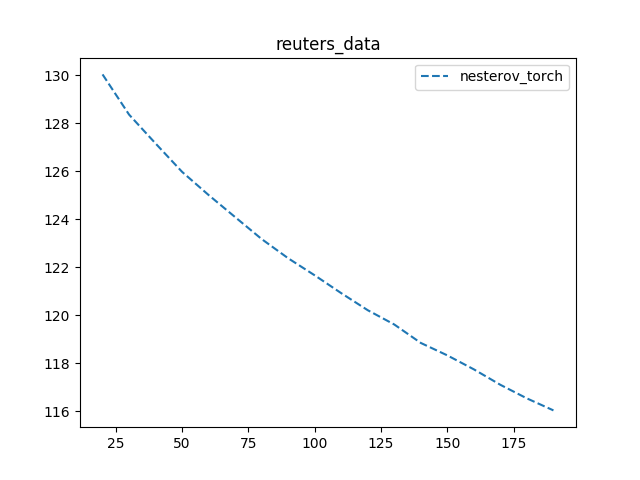

In [7]:
f, ax = plt.subplots()
ax.set_title("reuters_data")
plot_dict(errors_result, ax, log=False)